# BERT AND SVM FOR- SPAM DETECTION

# 1. Install and Import Dependencies

# BERT

In [ ]:
#pip install --upgrade torch



  Using cached https://files.pythonhosted.org/packages/9d/58/37166e7f71cd35e7f76d462fa058758a0aa6c31c1a7e26290f7898d37360/torch-2.4.1-cp38-cp38-win_amd64.whl


ERROR: torchvision 0.9.1+cu111 has requirement torch==1.8.1, but you'll have torch 2.4.1 which is incompatible.
ERROR: torchaudio 0.8.1 has requirement torch==1.8.1, but you'll have torch 2.4.1 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Python3.8\\Lib\\site-packages\\~orch\\lib\\asmjit.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/99/ff/c87e0622b1dadea79d2fb0b25ade9ed98954c9033722eb707053d310d4f3/sympy-1.13.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl
  Found existing installation: torch 1.8.1+cu111
    Uninstalling torch-1.8.1+cu111:
      Successfully uninstalled torch-1.8.1+cu111


In [ ]:
#pip install --upgrade transformers safetensors


  Using cached https://files.pythonhosted.org/packages/db/88/1ef8a624a33d7fe460a686b9e0194a7916320fc0d67d4e38e570beeac039/transformers-4.46.0-py3-none-any.whl
Requirement already up-to-date: safetensors in c:\python3.8\lib\site-packages (0.4.5)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: pyyaml>=5.1 in c:\python3.8\lib\site-packages (from transformers) (5.4.1)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Found existing installation: transformers 4.45.2
    Uninstalling transformers-4.45.2:
      Successfully uninstalled transformers-4.45.2


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

# Load the data
df = pd.read_csv('D:/2024/NCI/Semester 3/Practicum 2/GitHub/BERT test/BERTSentiment/spam.csv',encoding = 'latin-1')


# Check the data
print(df.head())

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to generate embeddings
def get_bert_embeddings(text):
    # Tokenize and encode the text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    
    # Get the BERT output
    with torch.no_grad():
        outputs = model(**inputs)

    # Take the embedding of the [CLS] token
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze()
    return cls_embedding

# Generate embeddings for each text in the dataframe
df['embeddings'] = df['v2'].apply(get_bert_embeddings)

# Example to see the embeddings
print(df[['v2', 'embeddings']].head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          embeddings  
0  [tensor(-0

In [12]:
df[['v2', 'embeddings']]

,v2,embeddings
0,"Go until jurong point, crazy.. Available only ...","[tensor(-0.1513), tensor(-0.3229), tensor(0.18..."
1,Ok lar... Joking wif u oni...,"[tensor(-0.1238), tensor(0.3435), tensor(-0.00..."
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[tensor(-0.5031), tensor(-0.2829), tensor(0.57..."
3,U dun say so early hor... U c already then say...,"[tensor(0.0646), tensor(0.5769), tensor(0.3411..."
4,"Nah I don't think he goes to usf, he lives aro...","[tensor(0.0947), tensor(0.3897), tensor(0.0389..."
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,"[tensor(-0.0725), tensor(0.0551), tensor(0.620..."
5568,Will Ì_ b going to esplanade fr home?,"[tensor(-0.0089), tensor(0.1375), tensor(0.270..."
5569,"Pity, * was in mood for that. So...any other s...","[tensor(-0.0464), tensor(0.0716), tensor(-0.28..."
5570,The guy did some bitching but I acted like i'd...,"[tensor(0.2887), tensor(0.2153), tensor(-0.353..."


# SVM MODEL

In [13]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Convert labels to numerical values (e.g., "ham" -> 0, "spam" -> 1)
df['label'] = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)

# Convert embeddings to a 2D array format
X = np.array([embedding.numpy() for embedding in df['embeddings']])
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.95      0.96      0.96       150

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [5]:
pip install matplotlib seaborn


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.



  Using cached https://files.pythonhosted.org/packages/16/51/58b0b9de42fe1e665736d9286f88b5f1556a0e22bed8a71f468231761083/matplotlib-3.7.5-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/75/7f/3c4e038998d2a54b282d605f6aaac4c596c49d55add3adc6559a735bb4cb/fonttools-4.54.1-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/96/1b/b05cd42c8d21767a0488b883b38658fb9a45f86c293b7b42521a8113dc5d/contourpy-1.1.1-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/52/77/7e04cca2ff1dc6ee6b7654cebe233de72b7a3ec5616501b6f3144fb70740/kiwisolver-1.4.7-cp38-cp38-win_amd64.whl


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.95      0.96      0.96       150

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



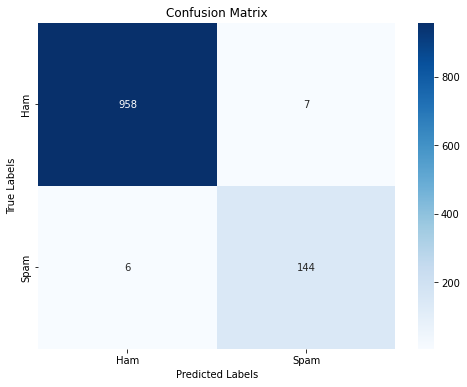

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
